
# Protein parameters analysis

The program performs most of the same functions as the Expasy ProtParam tool.
Protein parameters for analysing protein sequences.

The program calculates:

1. Molecular weight
2. Chemicalcomposition
3. Amino acid composition
4. pI
5. Extinction coefficient
6. Aromaticity
7. GRAVY and Instability_index


## Molecular weight

Amino acids are the building blocks that form polypeptides and ultimately proteins. Calculates the molecular weight of a protein.


In [1]:
from Bio import SeqIO
from Bio.SeqUtils.ProtParam import ProteinAnalysis

record = SeqIO.read("../data/sequence.fasta", "fasta")
# print(record)
total_aa = len(record.seq)
my_seq = str(record.seq)
analyzed_seq = ProteinAnalysis(my_seq)
mw = analyzed_seq.molecular_weight()
target_name = record.name

print(f'Molecular weigh of {target_name} is {mw:,.2f} Da.')
print(f'Total number of amino acid in {target_name} is {total_aa}.')

Molecular weigh of Aflibercept is 48,458.67 Da.
Total number of amino acid in Aflibercept is 431.


 ## Chemical composition


A chemical formula is a way of presenting information about the chemical proportions of atoms that constitute a particular chemical compound or molecule, using chemical element symbols, numbers, and sometimes also other symbols, such as parentheses, dashes, brackets, commas and plus (+) and minus (−) signs. These are limited to a single typographic line of symbols, which may include subscripts and superscripts.


In [2]:
def getMF(subSeq):
    listofaminoacids = []
    #Dictionary for each amino acid with atoms for each
    A = {'C':3, 'H':7, 'N':1, 'O':2, 'S':0}
    R = {'C':6, 'H':14,'N':4, 'O':2, 'S':0}
    N = {'C':4, 'H':8, 'N':2, 'O':3, 'S':0}
    D = {'C':4, 'H':7, 'N':1, 'O':4, 'S':0}
    C = {'C':3, 'H':7, 'N':1, 'O':2, 'S':1}
    Q = {'C':5, 'H':10,'N':2, 'O':3, 'S':0}
    E = {'C':5, 'H':9, 'N':1, 'O':4, 'S':0}
    G = {'C':2, 'H':5, 'N':1, 'O':2, 'S':0}
    H = {'C':6, 'H':9, 'N':3, 'O':2, 'S':0}
    I = {'C':6, 'H':13,'N':1, 'O':2, 'S':0}
    L = {'C':6, 'H':13,'N':1, 'O':2, 'S':0}
    K = {'C':6, 'H':14,'N':2, 'O':2, 'S':0}
    M = {'C':5, 'H':11,'N':1, 'O':2, 'S':1}
    F = {'C':9, 'H':11,'N':1, 'O':2, 'S':0}
    P = {'C':5, 'H':9, 'N':1, 'O':2, 'S':0}
    S = {'C':3, 'H':7, 'N':1, 'O':3, 'S':0}
    T = {'C':4, 'H':9, 'N':1, 'O':3, 'S':0}
    W = {'C':11,'H':12,'N':2, 'O':2, 'S':0}
    Y = {'C':9, 'H':11,'N':1, 'O':3, 'S':0}
    V = {'C':5, 'H':11,'N':1, 'O':2, 'S':0}
    
    dictOfAmino = {'A':A,'R':R,'N':N,'D':D,'C':C,'Q':Q, 'E':E, 'G':G,'H':H,'I':I,
                   'L':L,'K':K,'M':M,'F':F,'P':P,'S':S,'T':T,'W':W,'Y':Y,'V':V}
    mySeq = subSeq
    analysis = ProteinAnalysis(mySeq)
    listofaminoacids.append(analysis.count_amino_acids())

    for i in listofaminoacids:
        carbonTotal = 0
        hydrogenTotal = 0
        oxygenTotal = 0
        nitrogenTotal = 0
        sulfurTotal = 0
        peptideBonds = 0
        
        for value in i:
                for amino in dictOfAmino:
                        
                        if value == amino:
                                peptideBonds = peptideBonds + i[value]
                                thisAmino = {}
                                thisAmino = dictOfAmino[amino]
                                carbonTotal = carbonTotal + (i[value]*thisAmino['C'])
                                hydrogenTotal = hydrogenTotal + (i[value]*thisAmino['H'])
                                oxygenTotal = oxygenTotal + (i[value]*thisAmino['O'])
                                nitrogenTotal = nitrogenTotal + (i[value]*thisAmino['N'])
                                sulfurTotal = sulfurTotal + (i[value]*thisAmino['S'])
                                                             
        #Correcting totals for peptide bond loss of water
        peptideBonds = peptideBonds - 1
        hydrogenTotal = hydrogenTotal -(peptideBonds*2)
        oxygenTotal = oxygenTotal - (peptideBonds*1)
        outString = "C" + str(carbonTotal) + "H" + str(hydrogenTotal) + "N" + str(nitrogenTotal) + "O" + str(oxygenTotal) + "S" + str(sulfurTotal)
        total_atom = carbonTotal+hydrogenTotal+nitrogenTotal+oxygenTotal+sulfurTotal
        return outString, total_atom
    
print(f'Chemical formula of {target_name} is {getMF(my_seq)[0]}.')
print(f'Total number of atom in {target_name} is {getMF(my_seq)[1]}.')

Chemical formula of Aflibercept is C2159H3404N582O652S16.
Total number of atom in Aflibercept is 6813.


## Amino acid composition

We can easily count the number of each type of amino acid.

### Number of each amino acids

Simply counts the number times an amino acid is repeated in the protein sequence.

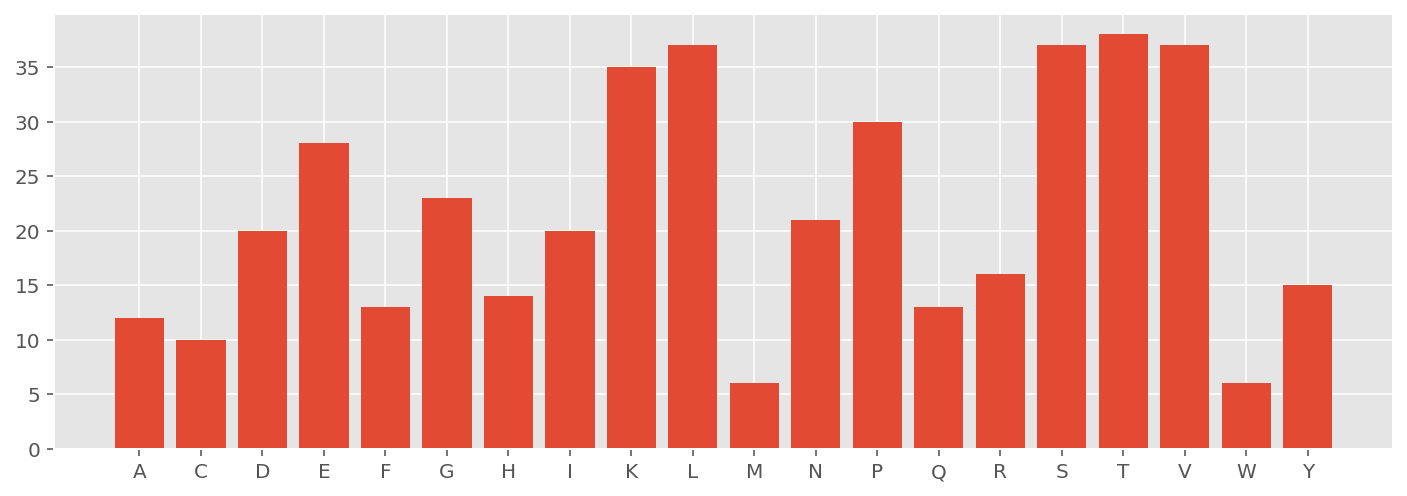

In [13]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' 
plt.figure(figsize=(12,4))
plt.style.use('ggplot')

data = analyzed_seq.count_amino_acids()
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.show()

In [4]:
negative_res = data['D']+data['E']
positive_res = data['K']+data['R']

print(f'Total number of positively charged residues (Arg + Lys) of {target_name} is {positive_res}.')
print(f'Total number of negatively charged residues (Asp + Glu) of {target_name} is {negative_res}.')

Total number of positively charged residues (Arg + Lys) of Aflibercept is 51.
Total number of negatively charged residues (Asp + Glu) of Aflibercept is 48.


### Percent of amino acid contents

The same as number of amino acid, only returns the number in percentage of entire sequence. When the total is taken as 100, the ratio of each amino acid is calculated.

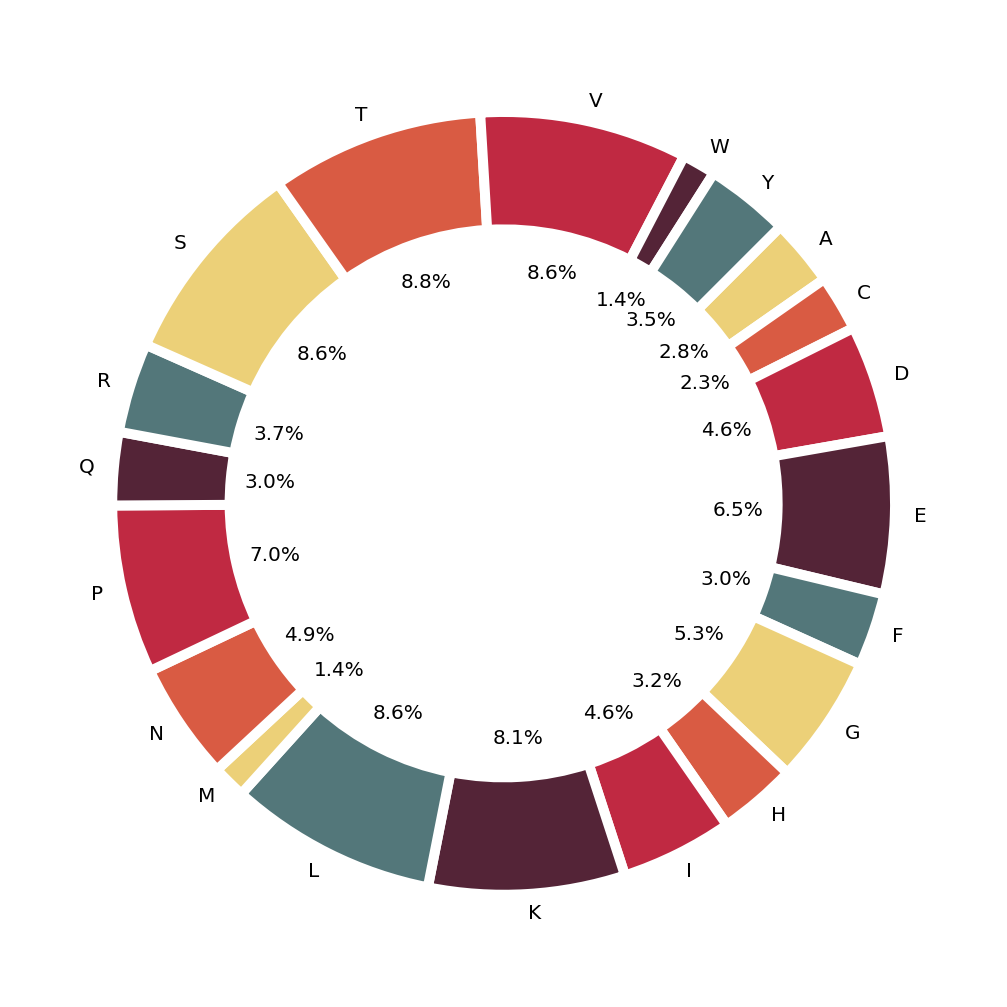

In [16]:
plt.figure(figsize=(10,10))

data = analyzed_seq.get_amino_acids_percent()
names = list(data.keys())
values = list(data.values())
# colors = ['#69D2E7', '#A7DBD8', '#E0E4CC', '#F38630', '#FA6900'] #goldfish
colors = ['#ECD078', '#D95B43', '#C02942', '#542437', '#53777A'] #Thought Provoking
wedgeprops={'width': 0.3, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(values, labels=names, autopct='%.1f%%', startangle=45, labeldistance=1.05,
        counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

## Theoretical pI

The isoelectric point (pI, pH(I), IEP), is the pH at which a molecule carries no net electrical charge or is electrically neutral in the statistical mean. 

The pI value can affect the solubility of a molecule at a given pH. Such molecules have minimum solubility in water or salt solutions at the pH that corresponds to their pI and often precipitate out of solution. Biological amphoteric molecules such as proteins contain both acidic and basic functional groups. 

In [6]:
print(f"Theoretical pI is {analyzed_seq.isoelectric_point():.3f}.")

Theoretical pI is 8.198.


### Charge of target protein ins PBS

Phosphate-buffered saline (abbreviated PBS) is a buffer solution (pH ~ 7.4) commonly used in biological research. 


```{note}
PBS has many uses because it is isotonic and non-toxic to most cells
```

In [7]:
#Calculates the charge of the protein for a given pH
charge = analyzed_seq.charge_at_pH(7.4)
if charge > 0:
    print(f"{target_name} is positive charged(+{charge:.3f}) in PBS")
elif charge == 0:
    print(f"{target_name} is neutral in PBS")
else:
    print(f"{target_name} is negative charged({charge:.3f}) in PBS")

Aflibercept is positive charged(+2.436) in PBS


## Extinction coefficient

Extinction (or extinction coefficient) is defined as the ratio of maximum to minimum transmission of a beam of light that passes through a polarization optical train.

extinction coefficient in units of  M<sup>-1</sup> cm<sup>-1</sup>, at 280 nm measured in water.


### with reduced cysteines


In [8]:
epsilon_prot = analyzed_seq.molar_extinction_coefficient()
print(f"Extinction coefficient of {target_name} at reduced condition is {epsilon_prot[0]}.")  # with reduced cysteine
print(f'Abs 0.1%(=1 g/L) is {epsilon_prot[0]/analyzed_seq.molecular_weight():.3f}.')

Extinction coefficient of Aflibercept at reduced condition is 55350.
Abs 0.1%(=1 g/L) is 1.142.


### with non-reduced cysteines

In [9]:
epsilon_prot = analyzed_seq.molar_extinction_coefficient()
print(f"Extinction coefficient of {target_name} at non-reduced condition is {epsilon_prot[1]}.")
print(f'Abs 0.1%(=1 g/L) is {epsilon_prot[1]/analyzed_seq.molecular_weight():.3f}.')

Extinction coefficient of Aflibercept at non-reduced condition is 55975.
Abs 0.1%(=1 g/L) is 1.155.


## Aromaticity

Calculate the aromaticity according to Lobry, 1994. Calculates the aromaticity value of a protein according to Lobry, 1994. It is simply the relative frequency of Phe+Trp+Tyr.



In [10]:
print(f"The Aromaticity of target protein is {analyzed_seq.aromaticity()*100:.3f}%.")

The Aromaticity of target protein is 7.889%.


## GRAVY

Protein GRAVY returns the GRAVY (grand average of hydropathy) value for the protein sequences you enter. The GRAVY value is calculated by adding the hydropathy value for each residue and dividing by the length of the sequence (Kyte and Doolittle; 1982). 

A higher value is more hydrophobic. A lower value is more hydrophilic.

In [11]:
gravy_value = analyzed_seq.gravy()
if gravy_value > 0:
    print(f"{target_name} is kind a more hydrophobic protein like membrane protein. The GRAVY value is {gravy_value:.3f}.")
else:
    print(f"{target_name} is kind a more hydrophilic protein. The GRAVY value is {gravy_value:.3f}.")

Aflibercept is kind a more hydrophilic protein. The GRAVY value is -0.460.


## Instability_index

Implementation of the method of Guruprasad et al. (1990, Protein Engineering, 4, 155-161). This method tests a protein for stability. Any value above 40 means the protein is unstable (=has a short half life).

In [12]:
instab = analyzed_seq.instability_index()
if instab >= 40:
    print(f"The instability index of {target_name} is computed to be {instab:.3f}, and it seems unstable.")
else:
    print(f"The instability index of {target_name} is computed to be {instab:.3f}, and it seems stable.")

The instability index of Aflibercept is computed to be 39.222, and it seems stable.
